# Quick Graphs in Python
## Chansoo Song and Gautam Sisodia

1. what are graphs?
2. history
3. use cases
4. graph algorithms
5. graphs in python: networkx
6. example: academic connections between universities
7. conclusion 

# 1 What are graphs?
A graph is a mathematical structure consisting of a set of objects called **nodes** and a set of connections between them called **edges**

|example graph|
|-|
|![graph](https://upload.wikimedia.org/wikipedia/commons/thumb/5/5b/6n-graf.svg/640px-6n-graf.svg.png)|
|[User:AzaToth [Public domain], via Wikimedia Commons](https://commons.wikimedia.org/wiki/File:6n-graf.svg)|

## Directed edges
- an edge is **directed** if one of the nodes it connects is specified as the start and the other as the end
  - think arrow
- example: social network, edges are people
  - friendship: undirected
  - following/messaged: directed
  
|friends|
|-|
|<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/a/a5/El_cuentito.jpg/600px-El_cuentito.jpg width="350">|
|Petrona Viera [Public domain], via [Wikimedia Commons](https://commons.wikimedia.org/wiki/File:El_cuentito.jpg)|

## Node and edge properties
- nodes and edges can have properties
- most common: a number called a **weight**
- example: nodes = subway stations, edges = tracks between stations
  - edge weight = length of tracks

|NYC subway|
|-|
|<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/0/04/NYC_subway-4D.svg/556px-NYC_subway-4D.svg.png width="350">|
|CountZ at English Wikipedia [CC BY-SA 3.0], via [Wikimedia Commons](https://commons.wikimedia.org/wiki/File:NYC_subway-4D.svg)|



# 2 History
## Seven bridges of Koningsburg
- city in Prussia (now Kaliningrad, Russia)
- is it possible to walk through the city, crossing each bridge once and only once?

|Koningsburg|
|-|
|<img src=https://upload.wikimedia.org/wikipedia/commons/1/15/Image-Koenigsberg%2C_Map_by_Merian-Erben_1652.jpg width="500">|
|Merian-Erben [Public domain], via [Wikimedia Commons](https://commons.wikimedia.org/wiki/File:Image-Koenigsberg,_Map_by_Merian-Erben_1652.jpg)|

## Euler's solution
- Leonhard Euler realized it was useful to think of the landmasses of the city as objects (nodes) and bridges as connections between them (edges)
- was able to prove in 1736 that no such path was possible
- laid the foundations for the study of graphs in math

|Euler|Koningsburg graph|
|-|-|
|![euler](https://upload.wikimedia.org/wikipedia/commons/a/a7/EulerLeonhard.jpg "Euler")|![koningsburg_graph](https://upload.wikimedia.org/wikipedia/commons/thumb/9/96/K%C3%B6nigsberg_graph.svg/300px-K%C3%B6nigsberg_graph.svg.png "Koningsburg graph")|
|[Jakob Emanuel Handmann [Public domain], via Wikimedia Commons](https://commons.wikimedia.org/wiki/File:EulerLeonhard.jpg)|[Mark Foskey [Public domain], via Wikimedia Commons](https://commons.wikimedia.org/wiki/File:K%C3%B6nigsberg_graph.png)|

## A nice graph theory result
- Four color theorem: four colors are enough to color every region of a map such that no two regions that touch have the same color

|Four coloring of US states|
|-|
|<img src=https://upload.wikimedia.org/wikipedia/commons/9/92/Map_of_USA_four_colours.svg width="500">|
|User:Derfel73; User:Dbenbenn [CC BY-SA 3.0], via [Wikimedia Commons](https://commons.wikimedia.org/wiki/File:Map_of_USA_four_colours.svg)|

# 3 Use cases


|Airport graph|
|-|
|<img src=http://www.martingrandjean.ch/wp-content/uploads/2016/05/airports-world-network.png width="550">|
|[Martin Grandjean [CC-BY-SA]](http://www.martingrandjean.ch/connected-world-air-traffic-network/)|

In [2]:
import networkx as nx

In [11]:
entity_res_ex = nx.Graph()

In [12]:
entity_res_ex.add_edges_from([
    ("Gautam Sisodia", "phone # 1"),
    ("sisodia, gautam", "phone # 1"),
    ("sisodia, gautam", "address 1"),
    ("sisodia, gautam", "phone # 2")])

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
def draw_graph_layout_cent(graph, layout, ax, node_size = 10, edge_lw = 0.1, cent = None):
    """
    draw the graph with the given layout on the given axis
    """
    cent_list = [200 * cent[k] if cent else node_size for k, v in layout.items()]
    ax.scatter([v[0] for k, v in layout.items()], [v[1] for k, v in layout.items()], s = cent_list)
    for k, v in layout.items():
        ax.annotate(k, v, xytext = (5, 5), textcoords = "offset points", fontsize = 10 + 5 * cent[k] if cent else 12)
    for e in [e for e in graph.edges]:
        ax.plot([layout[i][0] for i in e], [layout[i][1] for i in e], c = "steelblue", lw = edge_lw)
    ax.axis("off")

## Entity resolution
- example: identifying people with names, phone numbers and addresses
- identifiers are fuzzy: can have variations, can change 
- a graph can help keep track of correpondences between identifier values

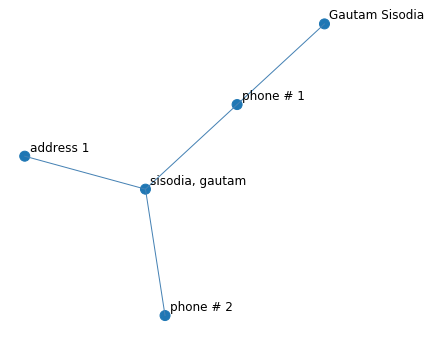

In [13]:
fig, ax = plt.subplots(figsize = (6, 6))
draw_graph_layout_cent(graph = entity_res_ex, layout = nx.kamada_kawai_layout(entity_res_ex), ax = ax, edge_lw = 1, node_size = 100)

## Multilayer Networks

- example:
    - twitter: tweets, retweets, mentions
    - transport: subway, bus, trains

![multilayer_networks](multilayer_network.png)
(source: Aleta and Moreno)

# 4 Graph algorithms

## Path finding
- finding optimal paths in a graph
- example: Dijkstra's algorithm, 1956
- example use: Bacon number (six degrees of separation from Kevin Bacon)

![chaplin_bacon](chaplin_bacon_number.PNG)

[http://oracleofbacon.org](http://oracleofbacon.org)

## Centrality

- Identify most "important" nodes
- Examples:
    - Degree, Closeness, Betweenness, Eigenvector
- Eigenvector Centrality
    
![e_c](eigenvector_centrality.png)
    

## Community detection

# 5 Graphs in python: networkx
networkx is a python package for creating and working with graphs

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


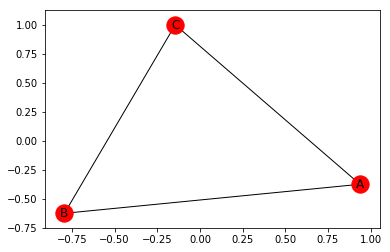

In [10]:
import networkx as nx
graph = nx.Graph()
graph.add_edges_from([("A", "B"), ("B", "C"), ("A", "C")])
nx.draw_networkx(graph)

# 6 Example: academic connections between universities
- the Mathematics Genealogy Project (https://genealogy.math.ndsu.nodak.edu/) collects information on math, computer science, statistics academics, including when and where they got their PhD and when and where their students got their PhDs
- can we use this information to spot trends in the movements of academics between universities (e.g. PhD from university A, advised students at university B)

|Euler's entry in the Mathematics Genealogy Project|
|-|
|<img src=https://raw.githubusercontent.com/chansooligans/math_geneology/master/presentation/euler_math_geneology.png width="400"/>|

#### Summary Statistics:

In [246]:
import pandas as pd
import networkx as nx
df = pd.read_csv('../data/math_geneology_final.csv')
df = df.fillna(' ')

#### Ensure Certain Columns Exist
cols = ['advisor_year','student_year','advisor_school','student_school']
for col in cols:
    df = df.loc[df[col].notnull() & (df[col] != ' '),:]
    
for col in ['student_school','advisor_school']:
    df[col] = [x.strip() for x in df[col]]   

def make_school_digraph(df_year):
    schools_df = pd.concat([df_year[[c]].rename(columns = {c: "school"}) for c in ["student_school", "advisor_school"]]).drop_duplicates()
    
    school_digraph = nx.DiGraph()
    # Nodes are schools (student and advisors) identified by name
    school_digraph.add_nodes_from(schools_df.school.values)
    
    # Edges connect advisor and student schools and are weighted by the number of advisor-students
    edges_df = df_year.groupby(["student_school", "advisor_school"], as_index = False).agg({"student_id": "count"})
    edges = [(e["advisor_school"], e["student_school"], {"weight": e["student_id"]}) for e in edges_df.to_dict(orient = "records")]
    school_digraph.add_edges_from(edges)
    return school_digraph

school_digraph = make_school_digraph(df)

In [247]:
print(nx.info(school_digraph))

Name: 
Type: DiGraph
Number of nodes: 3358
Number of edges: 31547
Average in degree:   9.3946
Average out degree:   9.3946


![whole_network](whole_network.png)

#### Show Subset

In [248]:
schools = ['New York University', 
           'Columbia University', 
           'Stevens Institute of Technology', 
           'Rutgers University, New Brunswick', 
           'City University of New York'
          ]
keep_rows = [row['student_school'] in schools and row['advisor_school'] in schools for i,row in df.iterrows()]
df_sample = df.loc[keep_rows,:].query('student_school != advisor_school')
school_digraph_sample = make_school_digraph(df_sample)

(-0.9989638537168503,
 1.1899467915296555,
 -1.1507783475518227,
 1.1507784071564675)

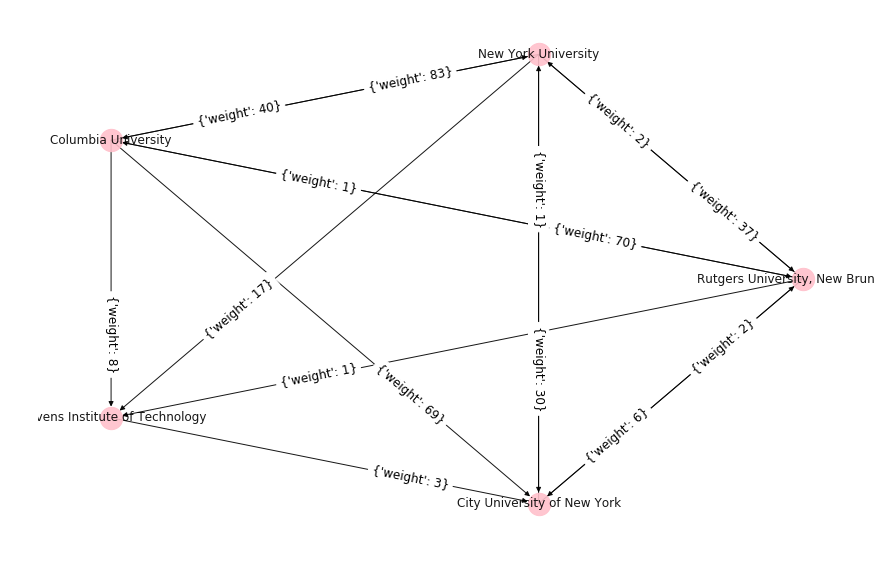

In [265]:
pos = nx.shell_layout(school_digraph_sample)
plt.figure(figsize=(15,10))
nx.draw_networkx(school_digraph_sample, pos, with_labels = True, arrows = True, width =1, linewidths =1, node_size = 500, node_color = 'pink', alpha=0.9, font_size=12)
edge_labels = nx.get_edge_attributes(school_digraph_sample,'weight')
nx.draw_networkx_edge_labels(school_digraph_sample, pos, labels = edge_labels, label_pos=0.3, font_size=12)
plt.axis('off')

![subset_graph](subset_graph.png)

# Hierarchy of Schools over Time

#### Degree Centrality
![out_degree](out_degree.png)

#### Eigenvector Centrality
![out_eigenvector](out_eigenvector.png)

#### Berkeley Degree Centrality
![berkeley](berkeley.png)

#### Berkeley Eigenvector Centrality
![berkeley_eigen](berkeley_eigen.png)

#### Lomonosov Degree Centrality
![lomonosov_moscow](lomonosov_moscow.png)

#### Lomonosov Eigen Centrality
![lomonosov_moscow](lomonosov_eigen.png)

#### Top Schools by Eigen Centrality
![top_schools](top_schools.png)

## Grouped by Country

![country](countries_over_time.png)

# Community Detection

# 7 Conclusion